<a href="https://colab.research.google.com/github/bjungweapon/mjc.ai.ml/blob/BDU/BDU_11_1%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%EB%82%98%EB%AC%B4_housing%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[ 알고리즘 개요 ]

. 의사 결정을 위한 규칙을 나무 모양으로 조합하여, 목표 변수(종속 변수)에 대한 예측을 수행하는 기법
 . 이전에 학습한 분류 기능가는 달리 각 항목의 범주를 예측하는 것이 아니라 , 어떠한 값 자체를 예측하는 것이며, 의사 나무 결정 나무를 학습하는 것은 최종적으로 회귀 나무를 구축하는 과정이다.

   Root NOde (Decision NOde) - Sub Node(Tree) - Leaf Tree

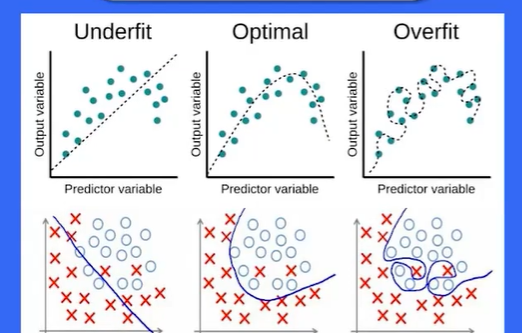

위 그림의  상단 그림을 보면, 회귀 모델인데,
  Underfit은 잘 분류되지 못한 것을 볼 수 있다면, Overfit는 비용이 많이 소요되고, (꼬불꼬불) , 새로운 데이터 값이 필요하면, 어렵게 된다

 위 그림의 하단 그림은 분류 모델인데, 이론은 동일한다.

 Underfit :  하나의 선으로 모든 것을 잘 표현해 줄 수 있느
 Overfit  :

[  접근 방법 ]
  . 종속 벼수는 median_house_value

   . 성능 평가는  MSE (평균 제곱 오차) 값을 모델의 성능을 평가.

     (잔차 == 오차 )

1. 필요 pkg import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor




 2. 데이터 불러오기

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")

3. 데이터 탐색

In [ ]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [ ]:
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

4. 데이터 전처리

In [ ]:
df = df.dropna(axis=0)

/// 다음과 같이 상관 관계 분석을 하자.
이번 예제 에서는 pearson 상관 분석을 적용.

Pearson 상관계수 (선형 관계 측정)

Spearman 상관계수 (비선형 관계 측정)

##단, 높은 상관 관계가 반드시 인과관계를 의미 하지는 않는다.

In [ ]:
## 변수들 간의 상관 관계 분석
corr = df.corr(method = "pearson")
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


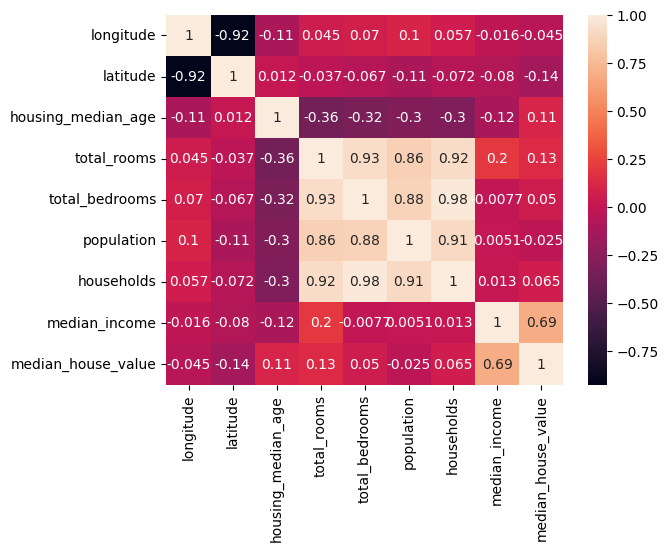

In [ ]:
ax = sns.heatmap(corr, annot = True)

5. 분석 data set 준비

// 분할 기준 : MSE를 최소화 하는 방향으로 데이터를 분할한다.
// 이것은 Decision Tree Regression 이므로  "최종 노드(leaf)에 도달했을 때, 해당 구간 내 타겟 값의 **평균을 **예측값으로 사용"


In [ ]:
##median house value를 제외한 X 변수와   y 변수를 구분한다.

X = df.drop("median_house_value", axis = 1)
y = df["median_house_value"]

## 분석 데이터 셋 분할 (7:3)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(14303, 8)
(6130, 8)
(14303,)
(6130,)


6. 분석 및 예측

In [ ]:
## 객체 생성

dtr = DecisionTreeRegressor( max_depth = 3, random_state = 42)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
## 학습이 완료된 dtr 객체에서 테스트 데이텅셋으로 예측

pred = dtr.predict(X_test)

pred

array([161047.82833787, 204355.50523292, 204355.50523292, ...,
       204355.50523292, 118587.94035322, 118587.94035322])

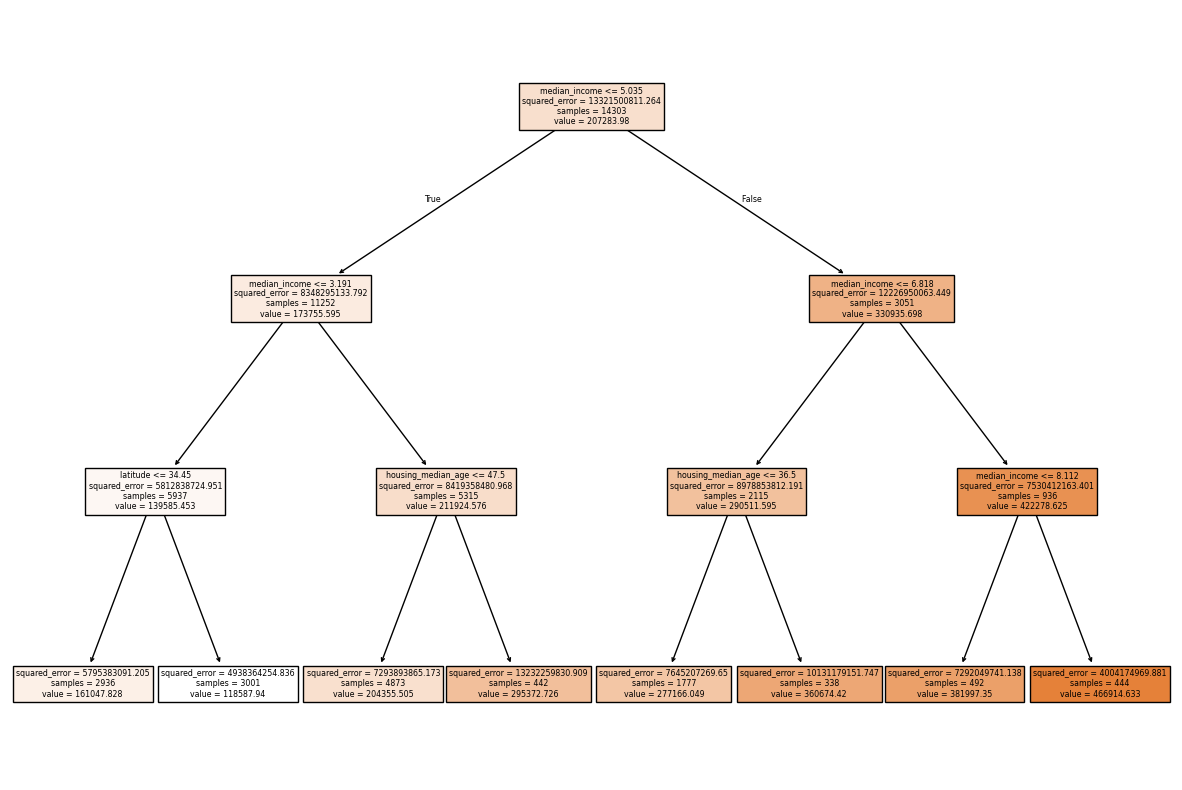

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dtr, feature_names=X.columns, filled=True)
plt.show()

7. 성능 평가

In [ ]:
### MSE를 사용하자.

from sklearn.metrics import mean_absolute_error

mse = mean_squared_error ( y_test, pred)   ## data set의 객수가 같아야 한다.

print(mse)

6793101269.876856


In [ ]:
## 학습이 완료된 dtr객체에서 학습 데이터셋으로 예측 수행

pred_train = dtr.predict(X_train)

mse =mean_squared_error(y_train, pred_train)

print(mse)
print(pred_train)

6684086804.552605
[118587.94035322 161047.82833787 277166.04895892 ... 161047.82833787
 277166.04895892 295372.72624434]


[ 도전과제]  의사 결정 나무 알고리즘의 파라미터를 변경하고 성능을 계산해 보자.

  n_estimators : 클수록 좋은 것.
  max_features
  max_depth  : 클수록 과적합 발생 가능성 높다.
  max_leaf_nodes
  min_smaplies_leaf
  

//
회귀 모델에서 MSE(Mean Squared Error)는 예측값과 실제값의 평균 제곱 오차를 측정하는 지표입니다. 보스톤 주택 가격 예측에서 MSE 값이 주는 주요 인사이트는 다음과 같습니다:

1. 오차 규모의 정량화
MSE 계산식:

MSE
=
1
n
∑
i
=
1
n
(
y
i
−
y
^
i
)
2
MSE=
n
1
  
i=1
∑
n
 (y
i
 −
y
^
  
i
 )
2

y
i
y
i
 : 실제 주택 가격,
y
^
i
y
^
  
i
 : 예측 가격

해석:

값이 클수록 예측 오차가 크다는 의미 (예: MSE=25,000,000 → RMSE=5,000 → 평균 오차 ±5,000$).

단위 문제: 주택 가격 단위가 $10,000인 경우, MSE=25 → 실제 오차는 약 $5,000(
25
25
 )입니다.

2. 과적합 vs. 일반화 성능 평가
훈련 데이터 MSE vs. 테스트 데이터 MSE:

경우	의미
훈련 MSE ≪ 테스트 MSE	모델이 훈련 데이터에 과적합되어 새로운 데이터 예측 능력 저하.
훈련 MSE ≈ 테스트 MSE	모델이 일반화 성능을 잘 유지하고 있음.
둘 다 높음	모델이 데이터 패턴을 충분히 학습하지 못한 과소적합 상태.
3. 특이치(Outlier) 영향 감지
MSE 특성: 큰 오차에 제곱 패널티를 부여하므로 특이치에 민감합니다.

예: 100만 $ 오차가 1건 발생 → MSE에 1조(
10
12
10
12
 ) 기여.

대응 전략: 이상치 제거 또는 Robust 회귀 모델(Huber Loss) 사용.

4. 모델 비교 및 개선 방향
모델 간 비교: 동일 데이터셋에서 MSE가 낮은 모델이 우수하지만, 과적합 여부 확인 필수.

성능 개선:

특성 공학: 상관관계 높은 변수 추가/제거.

트리 깊이 조정: max_depth 파라미터 튜닝.

앙상블: Random Forest나 Gradient Boosting 적용.

5. MSE의 한계와 보완 지표
한계:

단위가 실제 오차와 일치하지 않음 → RMSE로 변환 필요.

방향성 무시 → MAE와 병행 사용 권장.

보조 지표:

R²: 데이터 분산 설명 비율(1에 가까울수록 우수).

MAE: 평균 절대 오차(해석 용이).

1. MSE란 무엇인가요?
**MSE(Mean Squared Error)**는 예측값과 실제값의 오차를 제곱해서 평균을 낸 것입니다.

MSE
=
1
𝑛
∑
𝑖
=
1
𝑛
(
𝑦
𝑖
−
𝑦
^
𝑖
)
2
MSE=
n
1
​
  
i=1
∑
n
​
 (y
i
​
 −
y
^
​
  
i
​
 )
2

𝑦
𝑖
y
i
​
 : 실제 값

𝑦
^
𝑖
y
^
​
  
i
​
 : 예측 값

𝑛
n: 샘플 수

오차를 제곱하므로, 음/양 구분 없이 오차 크기를 평가하며, 큰 오차에 더 큰 패널티를 주게 됩니다.

📌 2. MSE 값이 주는 인사이트는?
✅ 단순한 수치 그 이상으로 다음의 의미를 가집니다:
MSE 값의 크기	의미	인사이트
낮다 (예: 0.5, 1.2 등)	예측값이 실제값과 거의 비슷하다	모델이 잘 학습되었고, 일반화가 잘 되었을 가능성이 있다
높다 (예: 50, 120 등)	예측값이 실제값과 차이가 크다	모델이 학습을 덜 했거나, 과적합/과소적합일 수 있다
Train MSE ≪ Test MSE	과적합 (overfitting)	훈련 데이터에 너무 민감하게 학습, 일반화 실패
Train MSE ≈ Test MSE 둘 다 큼	과소적합 (underfitting)	모델이 데이터 패턴을 제대로 학습 못함 (단순 모델일 수도 있음)
👀 예시로 직관적으로 이해해 볼까요?
예를 들어 집값 단위가 $100,000이라면:

MSE = 25
→ 평균적으로 오차 제곱이 25 → 오차의 평균 루트는 약 5 단위 = $500,000
→ 예측값이 실제값에서 약 50만 원 정도 차이 나는 셈입니다.

💬 그럼, 이걸로 무엇을 해야 할까요?
비교 지표로 사용

다양한 모델, 하이퍼파라미터 실험 후, MSE가 가장 낮은 모델 선택

다른 성능 지표(RMSE, MAE 등)와 함께 해석하면 더 좋음

모델 성능 개선 방향성 탐색

너무 크면: 모델 구조를 바꾸거나, 더 많은 데이터/특성 추가

Train/Test 간 차이가 크면: regularization 적용, pruning 등 고려

RMSE (√MSE)로 변환

MSE가 제곱 오차라 직관적이지 않을 수 있으므로, RMSE로 바꾸면 단위도 실제 target과 같아져 직관적입니다.

✨ 결론 요약:
MSE는 예측값이 실제값과 얼마나 차이 나는지를 수치로 나타내는 지표

낮을수록 모델의 성능이 좋은 것

Train/Test의 MSE 차이로 과적합/과소적합 판단 가능

해석할 때는 데이터의 단위와 **다른 지표(RMSE, MAE 등)**도 함께 고려하면 더 풍부한 인사이트를 얻을 수 있어요.



Decision Tree Regression 모델의 기본 동작 흐름 (with 보스턴 데이터)
1. 데이터 준비
보스턴 집값 데이터에는 다음과 같은 feature(입력 특성) 들이 있어요:

RM: 평균 방 개수

LSTAT: 하위계층 인구 비율

CRIM: 범죄율

PTRATIO: 지역의 학생-교사 비율

등등 총 13개 특성

target: MEDV (평균 집값, 예측하려는 값)

2. 모델 학습 준비
데이터를 학습용(train)과 테스트용(test)으로 나눕니다.

예: train_test_split(X, y, test_size=0.2)

3. 트리의 시작 (루트 노드 생성)
전체 학습 데이터를 보고, 어떤 특성을 어떤 기준값으로 나누었을 때 오차(MSE)가 가장 작아지는지를 찾습니다.

예를 들어:

“RM <= 6.5로 데이터를 나누면 오차가 제일 작네?”

그러면 **첫 분할 기준은 RM <= 6.5**가 됩니다.

4. 재귀적으로 분할 (트리 생성)
각각의 하위 그룹(노드)에 대해서 같은 방식으로 또 나눕니다.

이번엔 왼쪽 노드에서는 “LSTAT <= 12.3”으로, 오른쪽은 “PTRATIO <= 18.5” 등등…

이렇게 계속 나누는 이유는, 각 노드 내의 데이터들이 점점 더 비슷한 집값을 갖게 만들기 위해서입니다.

트리 생성은 다음 조건들 중 하나에 도달하면 멈춥니다:

노드의 데이터 수가 너무 적다 (예: min_samples_split)

트리의 깊이가 너무 깊다 (예: max_depth)

더 이상 오차 개선이 없다

5. 리프 노드에서의 예측값 계산
더 이상 분할이 안 되는 리프 노드에서는, 그 노드에 속한 데이터들의 평균 집값을 예측값으로 사용합니다.

예: 리프 노드에 MEDV가 [22.0, 21.5, 22.3] 이 있었다면, 예측값은 (22.0 + 21.5 + 22.3)/3 = 21.93 이 됩니다.

6. 새로운 데이터 예측
새로운 집에 대한 특성값이 주어지면, 그 값을 기준으로 트리의 분기(branch)를 따라가서 해당 집이 도달하게 되는 리프 노드에서 예측값을 반환합니다.

예:

RM = 7.0 → 오른쪽으로 감

LSTAT = 8.0 → 왼쪽으로 감

PTRATIO = 15.0 → 오른쪽으로 감

→ 도착한 리프 노드의 평균값: 예측값 = 28.1

📌 그림으로 비유하면…
트리 구조는 마치 다음과 같은 느낌이에요:

css
복사
편집
       [RM <= 6.5]
          /    \
      Yes       No
     /           \
[LSTAT<=12.3]   [PTRATIO<=18.5]
   ...             ...
(리프 노드: 평균 집값)
✨ 이 흐름을 통해 알 수 있는 것들
해석 가능성: 어떤 특성이 예측에 영향을 많이 주었는지 알 수 있어요 (feature importance)

비선형 관계 학습: 단순한 선형 모델보다 복잡한 관계도 잘 학습할 수 있어요

성능: 적절한 하이퍼파라미터 (max_depth 등)를 설정해야 과적합을 방지할 수 있어요

💡 마무리 요약


[ 의사 결정 트리  : Dicision Tree 의  animation ]

1. 의사 결정 트리의  분류

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib.animation import FuncAnimation

# 데이터 생성
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

# 의사결정트리 모델 초기화
clf = DecisionTreeClassifier(max_depth=5, random_state=42)
clf.fit(X, y)

# 애니메이션을 위한 설정
fig, ax = plt.subplots(figsize=(8, 6))
scat = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
ax.set_title("Decision Tree Classification")

def update(frame):
    ax.clear()
    # 현재 프레임까지의 깊이로 트리 재학습
    clf = DecisionTreeClassifier(max_depth=frame+2, random_state=42)
    clf.fit(X, y)
    # 결정 경계 시각화
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Set1)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
    ax.set_title(f"Decision Tree Classification (Depth: {frame+1})")

ani = FuncAnimation(fig, update, frames=5, interval=1000)
###plt.show()


# Colab에서 애니메이션 표시
plt.close()  # 백그라운드 그림 닫기
from IPython.display import display
display(HTML(ani.to_jshtml()))



2. decision tree   regression  (평균값)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from matplotlib.animation import FuncAnimation

# 데이터 생성
np.random.seed(42)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# 애니메이션을 위한 설정
fig, ax = plt.subplots(figsize=(8, 6))
line, = ax.plot([], [], color='red', label='Prediction')
scatter = ax.scatter(X, y, edgecolor='k', label='Data')
ax.set_xlim(0, 5)
ax.set_ylim(-1.5, 1.5)
ax.set_title("Decision Tree Regression")
ax.legend()

def update(frame):
    ax.clear()
    # 현재 프레임까지의 깊이로 트리 재학습
    clf = DecisionTreeRegressor(max_depth=frame+1)
    clf.fit(X, y)
    X_test = np.linspace(0, 5, 500).reshape(-1, 1)
    y_pred = clf.predict(X_test)
    ax.plot(X_test, y_pred, color='red', label='Prediction')
    ax.scatter(X, y, edgecolor='k', label='Data')
    ax.set_xlim(0, 5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_title(f"Decision Tree Regression (Depth: {frame+1})")
    ax.legend()

ani = FuncAnimation(fig, update, frames=5, interval=1000)


##plt.show()



# Colab에서 애니메이션 표시
plt.close()  # 백그라운드 그림 닫기
from IPython.display import display
display(HTML(ani.to_jshtml()))




claudia 에서

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.datasets import make_classification, make_regression
from IPython.display import HTML, display
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# 한글 표시를 위한 설정
!pip install koreanize-matplotlib
import koreanize_matplotlib


plt.style.use('seaborn-v0_8-whitegrid')

#################################################
# 1. 분류(Classification) 시각화
#################################################

def generate_classification_data(n_samples=100, random_state=42):
    """분류용 데이터 생성"""
    X, y = make_classification(
        n_samples=n_samples,
        n_features=2,
        n_informative=2,
        n_redundant=0,
        n_clusters_per_class=1,
        random_state=random_state
    )
    return X, y

def plot_classification_boundary(ax, clf, X, y, show_tree_path=False, test_point=None):
    """분류 결정 경계 시각화"""
    # 결정 경계 시각화를 위한 그리드 생성
    margin = 0.5
    x_min, x_max = X[:, 0].min() - margin, X[:, 0].max() + margin
    y_min, y_max = X[:, 1].min() - margin, X[:, 1].max() + margin

    # 그리드 생성
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 200),
        np.linspace(y_min, y_max, 200)
    )

    # 그리드 포인트에 대한 예측값 계산
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # 결정 경계 플롯
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)

    # 데이터 포인트 플롯
    scatter = ax.scatter(
        X[:, 0], X[:, 1],
        c=y,
        cmap=plt.cm.coolwarm,
        edgecolor='k',
        s=60,
        alpha=0.8
    )

    # 테스트 데이터 포인트 (예측 과정 시각화용)
    if test_point is not None:
        ax.scatter(
            test_point[0], test_point[1],
            marker='*',
            s=200,
            color='lime',
            edgecolor='black',
            linewidth=1.5,
            zorder=10,
            label='TEST POINT'
        )

        # 의사결정 트리 경로 시각화
        if show_tree_path:
            # 현재 포인트가 어느 노드에 속하는지 경로 추적
            tree = clf.tree_
            node_indicator = tree.decision_path([test_point])
            leaf_id = tree.apply([test_point])[0]

            # 경로 상의 노드들
            node_index = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]

            # 이전 노드와 현재 노드를 연결하는 결정 경계 시각화
            previous_node = -1
            for node_id in node_index:
                if previous_node != -1:
                    # 노드 간 연결 표시 (현재는 간단히 하기 위해 생략)
                    pass

                # 현재 노드가 리프 노드가 아니면 분기점 표시
                if node_id != leaf_id:
                    threshold = tree.threshold[node_id]
                    feature = tree.feature[node_id]

                    # 특성이 x축이면 수직선, y축이면 수평선
                    if feature == 0:  # x축 기준 분할
                        ax.axvline(x=threshold, color='red', linestyle='--', alpha=0.5)
                    else:  # y축 기준 분할
                        ax.axhline(y=threshold, color='red', linestyle='--', alpha=0.5)

                previous_node = node_id

    # 축 범위 설정
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)

    # 범례 추가
    legend_handles = [
        mpatches.Patch(color=plt.cm.coolwarm(0.2), label='CLASS 0'),
        mpatches.Patch(color=plt.cm.coolwarm(0.8), label='CLASS 1')
    ]
    if test_point is not None:
        legend_handles.append(plt.Line2D([0], [0], marker='*', color='w',
                                        markerfacecolor='lime', markersize=15, label='TEST POINT'))
    ax.legend(handles=legend_handles, loc='upper right')

    return scatter

def update_classification_learning(frame, ax, X, y, random_state):
    """분류 학습 과정 애니메이션 업데이트 함수"""
    ax.clear()

    # 현재 프레임의 깊이로 트리 학습
    depth = frame + 1
    clf = DecisionTreeClassifier(max_depth=depth, random_state=random_state)
    clf.fit(X, y)

    # 결정 경계 시각화
    plot_classification_boundary(ax, clf, X, y)

    # 정확도 계산
    accuracy = clf.score(X, y) * 100

    # 제목 설정
    ax.set_title(f'의사결정 트리 분류 학습 과정 (깊이: {depth}, 정확도: {accuracy:.1f}%)', fontsize=14)
    ax.set_xlabel('FEATURE 1', fontsize=12)
    ax.set_ylabel('FEATURE 2', fontsize=12)

    # 트리 정보 표시
    n_nodes = clf.tree_.node_count
    ax.text(
        0.02, 0.02,
        f'노드 수: {n_nodes}\nNUMBER OF LEAF NODE: {clf.tree_.n_leaves}',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'),
        fontsize=10
    )

    return ax

def update_classification_prediction(frame, ax, X, y, test_point, max_depth, random_state):
    """분류 예측 과정 애니메이션 업데이트 함수"""
    ax.clear()

    # 학습된 트리 (고정 깊이)
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    clf.fit(X, y)

    # 테스트 포인트의 예측 경로 시각화
    show_tree_path = frame > 0  # 첫 프레임에서는 경로 없이 보여줌
    plot_classification_boundary(ax, clf, X, y, show_tree_path=show_tree_path, test_point=test_point)

    # 예측 결과
    if frame > 0:
        pred = clf.predict([test_point])[0]
        proba = clf.predict_proba([test_point])[0]
        pred_txt = f'예측 클래스: {pred} (확률: {proba[pred]:.2f})'
    else:
        pred_txt = "새로운 데이터 포인트를 판단하는 과정"

    # 제목 설정
    ax.set_title(f'의사결정 트리 분류 판단 과정 (깊이: {max_depth})', fontsize=14)
    ax.set_xlabel('특성 1', fontsize=12)
    ax.set_ylabel('특성 2', fontsize=12)

    # 예측 정보 표시
    if frame > 0:
        ax.text(
            0.5, 0.02,
            pred_txt,
            transform=ax.transAxes,
            bbox=dict(facecolor='yellow', alpha=0.8, boxstyle='round,pad=0.5'),
            fontsize=12,
            ha='center'
        )

    return ax

def create_classification_learning_animation(max_depth=5, interval=800):
    """분류 학습 과정 애니메이션 생성"""
    # 데이터 생성
    X, y = generate_classification_data(n_samples=100)

    # 그림 설정
    fig, ax = plt.subplots(figsize=(10, 7))

    # 애니메이션 생성
    ani = FuncAnimation(
        fig,
        update_classification_learning,
        frames=max_depth,
        fargs=(ax, X, y, 42),
        interval=interval,
        repeat=True
    )

    plt.close()  # 백그라운드 그림 닫기

    # Jupyter/Colab 환경에서 애니메이션 표시
    return HTML(ani.to_jshtml())

def create_classification_prediction_animation(max_depth=3, interval=1500):
    """분류 예측 과정 애니메이션 생성"""
    # 데이터 생성
    X, y = generate_classification_data(n_samples=100)

    # 테스트 포인트 생성 (클래스 경계 근처에 생성)
    # 여기서는 간단히 데이터의 중심 부근에 포인트 생성
    test_point = np.array([0.5, 0.5])

    # 그림 설정
    fig, ax = plt.subplots(figsize=(10, 7))

    # 애니메이션 생성 (2프레임: 첫 프레임은 테스트 포인트만, 두번째 프레임은 예측 경로)
    ani = FuncAnimation(
        fig,
        update_classification_prediction,
        frames=2,
        fargs=(ax, X, y, test_point, max_depth, 42),
        interval=interval,
        repeat=True
    )

    plt.close()  # 백그라운드 그림 닫기

    # Jupyter/Colab 환경에서 애니메이션 표시
    return HTML(ani.to_jshtml())

#################################################
# 2. 회귀(Regression) 시각화
#################################################

def generate_regression_data(n_samples=100, random_state=42):
    """회귀용 데이터 생성"""
    # 1차원 특성으로 간단하게 생성 (시각화 용이)
    X, y = make_regression(
        n_samples=n_samples,
        n_features=1,
        noise=20,
        random_state=random_state
    )

    # y값 스케일 조정
    y = y / 10

    return X, y

def plot_regression_line(ax, reg, X, y, show_tree_path=False, test_point=None):
    """회귀 결정 경계 시각화"""
    # X 범위 설정
    x_min, x_max = X.min() - 1, X.max() + 1

    # 예측선을 그리기 위한 X 값들
    X_plot = np.linspace(x_min, x_max, 500).reshape(-1, 1)
    y_pred = reg.predict(X_plot)

    # 데이터 포인트 플롯
    ax.scatter(X, y, alpha=0.6, edgecolor='k', s=60, label='학습 데이터')

    # 예측선 (계단 형태)
    ax.step(X_plot.flatten(), y_pred, where='post', color='red', linewidth=2, label='예측선')

    # 테스트 포인트 (예측 과정 시각화용)
    if test_point is not None:
        test_x = test_point.reshape(1, -1)
        test_y_pred = reg.predict(test_x)[0]

        # 테스트 포인트
        ax.scatter(
            test_point, test_y_pred,
            marker='*',
            s=200,
            color='lime',
            edgecolor='black',
            linewidth=1.5,
            zorder=10,
            label='테스트 포인트'
        )

        # 예측값 연결선
        ax.vlines(test_point, y.min(), test_y_pred, colors='green', linestyles='dashed', alpha=0.7)
        ax.hlines(test_y_pred, x_min, test_point, colors='green', linestyles='dashed', alpha=0.7)

        # 의사결정 트리 경로 시각화
        if show_tree_path:
            # 회귀 트리의 분할 지점 표시
            tree = reg.tree_
            thresholds = []

            # 경로 상의 노드들
            node_indicator = tree.decision_path(test_x)
            node_index = node_indicator.indices[node_indicator.indptr[0]:node_indicator.indptr[1]]

            # 경로 상의 threshold 값들 찾기
            for node_id in node_index:
                if tree.feature[node_id] != -2:  # -2는 리프노드
                    thresholds.append(tree.threshold[node_id])

            # 분할 지점 표시
            for threshold in thresholds:
                ax.axvline(x=threshold, color='blue', linestyle='--', alpha=0.5)

    # 축 범위 설정
    ax.set_xlim(x_min, x_max)
    y_margin = (y.max() - y.min()) * 0.1
    ax.set_ylim(y.min() - y_margin, y.max() + y_margin)

    # 범례
    ax.legend(loc='upper right')

    return ax

def update_regression_learning(frame, ax, X, y, random_state):
    """회귀 학습 과정 애니메이션 업데이트 함수"""
    ax.clear()

    # 현재 프레임의 깊이로 트리 학습
    depth = frame + 1
    reg = DecisionTreeRegressor(max_depth=depth, random_state=random_state)
    reg.fit(X, y)

    # 회귀선 시각화
    plot_regression_line(ax, reg, X, y)

    # MSE 계산
    y_pred = reg.predict(X)
    mse = np.mean((y - y_pred) ** 2)

    # 제목 설정
    ax.set_title(f'의사결정 트리 회귀 학습 과정 (깊이: {depth}, MSE: {mse:.4f})', fontsize=14)
    ax.set_xlabel('특성', fontsize=12)
    ax.set_ylabel('타겟값', fontsize=12)

    # 트리 정보 표시
    n_nodes = reg.tree_.node_count
    ax.text(
        0.02, 0.98,
        f'노드 수: {n_nodes}\n리프 노드 수: {reg.tree_.n_leaves}',
        transform=ax.transAxes,
        bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.5'),
        fontsize=10,
        va='top'
    )

    return ax

def update_regression_prediction(frame, ax, X, y, test_point, max_depth, random_state):
    """회귀 예측 과정 애니메이션 업데이트 함수"""
    ax.clear()

    # 학습된 트리 (고정 깊이)
    reg = DecisionTreeRegressor(max_depth=max_depth, random_state=random_state)
    reg.fit(X, y)

    # 테스트 포인트의 예측 경로 시각화
    show_tree_path = frame > 0  # 첫 프레임에서는 경로 없이 보여줌
    plot_regression_line(ax, reg, X, y, show_tree_path=show_tree_path, test_point=test_point)

    # 예측 결과
    if frame > 0:
        pred = reg.predict([test_point])[0]
        pred_txt = f'예측값: {pred:.2f}'
    else:
        pred_txt = "새로운 데이터 포인트를 판단하는 과정"

    # 제목 설정
    ax.set_title(f'의사결정 트리 회귀 판단 과정 (깊이: {max_depth})', fontsize=14)
    ax.set_xlabel('특성', fontsize=12)
    ax.set_ylabel('타겟값', fontsize=12)

    # 예측 정보 표시
    if frame > 0:
        ax.text(
            0.5, 0.02,
            pred_txt,
            transform=ax.transAxes,
            bbox=dict(facecolor='yellow', alpha=0.8, boxstyle='round,pad=0.5'),
            fontsize=12,
            ha='center'
        )

    return ax

def create_regression_learning_animation(max_depth=5, interval=800):
    """회귀 학습 과정 애니메이션 생성"""
    # 데이터 생성
    X, y = generate_regression_data(n_samples=100)

    # 그림 설정
    fig, ax = plt.subplots(figsize=(12, 7))

    # 애니메이션 생성
    ani = FuncAnimation(
        fig,
        update_regression_learning,
        frames=max_depth,
        fargs=(ax, X, y, 42),
        interval=interval,
        repeat=True
    )

    plt.close()  # 백그라운드 그림 닫기

    # Jupyter/Colab 환경에서 애니메이션 표시
    return HTML(ani.to_jshtml())

def create_regression_prediction_animation(max_depth=3, interval=1500):
    """회귀 예측 과정 애니메이션 생성"""
    # 데이터 생성
    X, y = generate_regression_data(n_samples=100)

    # 테스트 포인트 생성 (X 범위 내에서 임의 지점)
    test_point = np.array([0.5])

    # 그림 설정
    fig, ax = plt.subplots(figsize=(12, 7))

    # 애니메이션 생성 (2프레임: 첫 프레임은 테스트 포인트만, 두번째 프레임은 예측 경로)
    ani = FuncAnimation(
        fig,
        update_regression_prediction,
        frames=2,
        fargs=(ax, X, y, test_point, max_depth, 42),
        interval=interval,
        repeat=True
    )

    plt.close()  # 백그라운드 그림 닫기

    # Jupyter/Colab 환경에서 애니메이션 표시
    return HTML(ani.to_jshtml())

#################################################
# 3. 트리 구조 시각화
#################################################

def visualize_tree_structure(model_type='classification', max_depth=3):
    """트리 구조 시각화"""
    if model_type == 'classification':
        X, y = generate_classification_data()
        model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
        title = f'분류 의사결정 트리 구조 (깊이: {max_depth})'
        class_names = [f'클래스 {i}' for i in range(2)]
    else:  # regression
        X, y = generate_regression_data()
        model = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
        title = f'회귀 의사결정 트리 구조 (깊이: {max_depth})'
        class_names = None

    model.fit(X, y)

    # 특성 이름 설정
    if model_type == 'classification':
        feature_names = [f'특성 {i+1}' for i in range(2)]
    else:
        feature_names = ['특성']

    # 그림 생성
    plt.figure(figsize=(15, 10))
    plot_tree(
        model,
        filled=True,
        feature_names=feature_names,
        class_names=class_names,
        rounded=True,
        fontsize=10
    )
    plt.title(title, fontsize=14)
    plt.tight_layout()

    return plt.gcf()

#################################################
# 4. 실행 코드
#################################################

# 사용 예시
print("의사결정 트리 애니메이션 데모")
print("\n1. 분류 학습 과정 애니메이션")
classification_learning_animation = create_classification_learning_animation(max_depth=5, interval=1000)
display(classification_learning_animation)

print("\n2. 분류 예측 과정 애니메이션")
classification_prediction_animation = create_classification_prediction_animation(max_depth=3, interval=2000)
display(classification_prediction_animation)

print("\n3. 회귀 학습 과정 애니메이션")
regression_learning_animation = create_regression_learning_animation(max_depth=5, interval=1000)
display(regression_learning_animation)

print("\n4. 회귀 예측 과정 애니메이션")
regression_prediction_animation = create_regression_prediction_animation(max_depth=3, interval=2000)
display(regression_prediction_animation)

# 트리 구조 시각화
print("\n5. 의사결정 트리 구조 시각화")
print("분류 트리 구조:")
fig_class = visualize_tree_structure(model_type='classification', max_depth=3)
display(fig_class)

print("회귀 트리 구조:")
fig_reg = visualize_tree_structure(model_type='regression', max_depth=3)
display(fig_reg)

의사결정 트리 애니메이션 데모

1. 분류 학습 과정 애니메이션


<ipython-input-17-f47ad6a534bd>:214: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) Liberation Sans.
  return HTML(ani.to_jshtml())
<ipython-input-17-f47ad6a534bd>:214: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) Liberation Sans.
  return HTML(ani.to_jshtml())
<ipython-input-17-f47ad6a534bd>:214: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) Liberation Sans.
  return HTML(ani.to_jshtml())
<ipython-input-17-f47ad6a534bd>:214: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) Liberation Sans.
  return HTML(ani.to_jshtml())
<ipython-input-17-f47ad6a534bd>:214: UserWarning: Glyph 53944 (\N{HANGUL SYLLABLE TEU}) missing from font(s) Liberation Sans.
  return HTML(ani.to_jshtml())
<ipython-input-17-f47ad6a534bd>:214: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from font(s) Liberation Sans.
  return HTML(ani.to_jshtml())
<ipython-input-17-f47ad6a534bd>:214: UserWarning: Glyph 4


2. 분류 예측 과정 애니메이션


<ipython-input-17-f47ad6a534bd>:241: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from font(s) Liberation Sans.
  return HTML(ani.to_jshtml())
<ipython-input-17-f47ad6a534bd>:241: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from font(s) Liberation Sans.
  return HTML(ani.to_jshtml())
<ipython-input-17-f47ad6a534bd>:241: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from font(s) Liberation Sans.
  return HTML(ani.to_jshtml())
<ipython-input-17-f47ad6a534bd>:241: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) Liberation Sans.
  return HTML(ani.to_jshtml())
<ipython-input-17-f47ad6a534bd>:241: UserWarning: Glyph 44208 (\N{HANGUL SYLLABLE GYEOL}) missing from font(s) Liberation Sans.
  return HTML(ani.to_jshtml())
<ipython-input-17-f47ad6a534bd>:241: UserWarning: Glyph 51221 (\N{HANGUL SYLLABLE JEONG}) missing from font(s) Liberation Sans.
  return HTML(ani.to_jshtml())
<ipython-input-17-f47ad6a534bd>:241: UserWarning: Gly

ValueError: X should be in np.ndarray format, got <class 'list'>